# Frozen Lake - Reinforcement Learning Homework
<br/>__Project Objective: To teach the agent to move to the target in the frozen lake without falling into a hole__ <br/><br/>
__For more details [click here!](https://www.kaggle.com/c/108-2-ntut-drl-hw1)__<br/>

#### Work Plan:
* Determine the parameters
* Train the agent by exploration and exploitation (ε - greedy)
* Examine the agent's behavior in real time


In [1]:
#First and foremost: make an import to all the necessary libraries
import gym
import random
import time
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Make the environment
env = gym.make("FrozenLake-v1")

In [3]:
#Define an empty Q table
actions_space_size = env.action_space.n
states_space_size = env.observation_space.n
Q_table = np.zeros((states_space_size, actions_space_size))

In [4]:
Q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
#All fixed parameters
eposides_number = 10000
steps_per_eposide = 100

learning_rate = 0.1
discount_rate = 0.99

P_exploration = 1 
max_exploration = 1
min_exploration= 0.1
exploration_decay = 0.001

Now, we update the q table by the following equation:
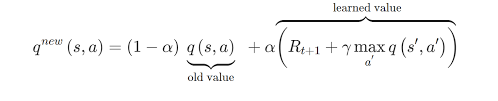
When the s' (next-state) is selected according to ε greedy

In [6]:
rewards = np.zeros([eposides_number])

for eposide in range(eposides_number):
    state = env.reset()
    
    done = False
    rewards_current_eposide = 0
    
    for step in range(steps_per_eposide):
        
        #Next state choosing by exploration and exploitation
        
        exploration_rate_treshold = random.uniform(0, 1)
        
        if exploration_rate_treshold > P_exploration:
            action = np.argmax(Q_table[state,:])
        else:
            action = env.action_space.sample()
        
        #Agent movement
        
        new_state, reward, done, info = env.step(action)
        
        #Update Q TABLE according to the equation
        
        Q_table[state,action] = Q_table[state, action] * (1 - learning_rate) + \
                                learning_rate * (reward + discount_rate * np.max(Q_table[new_state, :]))
        
        state = new_state
        rewards_current_eposide += reward
        
        
        
        if done == True:
            break
    
    #Decrease the probability of exploration, 
    #(as we progress with our information - it makes less sense to choose an exploration)
    
    P_exploration = min_exploration + (max_exploration - min_exploration) * np.exp(-exploration_decay*eposide)
    
    rewards[eposide] = rewards_current_eposide
    


~ Average reward per 1000 eposides ~



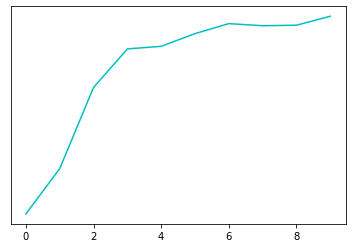


~ Q table after training ~

[[0.61363138 0.57926822 0.57895729 0.56103275]
 [0.3505376  0.30724649 0.29107389 0.54131157]
 [0.4434104  0.44016944 0.44517419 0.50363193]
 [0.35782672 0.34819598 0.28467599 0.48164546]
 [0.63110054 0.45737658 0.30038292 0.30702307]
 [0.         0.         0.         0.        ]
 [0.17289192 0.15718097 0.34704465 0.22030837]
 [0.         0.         0.         0.        ]
 [0.33840553 0.49276942 0.47680699 0.67141665]
 [0.49107855 0.70790153 0.40518428 0.36618781]
 [0.6500362  0.59004098 0.43877866 0.33320531]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.42287562 0.63777591 0.84890204 0.51491474]
 [0.74517795 0.92778443 0.8289797  0.80025092]
 [0.         0.         0.         0.        ]]


In [7]:
reward_per_1000_eposides = np.array(np.split(rewards, eposides_number / 1000))
reward_per_1000_eposides = np.average(reward_per_1000_eposides, axis=1)

print("\n~ Average reward per 1000 eposides ~\n")

plt.plot(range(0,10), reward_per_1000_eposides, 'c')
plt.yticks([])
plt.show()

print("\n~ Q table after training ~\n")

print(Q_table)

In [12]:
#Examining the agent in real time (5-times)

for eposide in range(5):
    
    state = env.reset()
    done = False
    
    time.sleep(0.5)
    
    for step in range(steps_per_eposide):
        clear_output(wait = True)
        env.render()
        time.sleep(0.1)
        
        action = np.argmax(Q_table[state, :])  
        new_state, reward, done, info = env.step(action)
        
        if done == True:
            clear_output(wait = True)
            env.render()
            
            if reward == 1:
                print("Success")
                time.sleep(1)
            if reward == 0:
                print("Failure")
                time.sleep(1)
                
            clear_output(wait = True)
            break
            
        state = new_state
        
env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
Success


The agent seems to have learned something today :)